In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import numpy

In [14]:
transform=transforms.ToTensor()
transform=transforms.Compose([

    transforms.ToTensor()
])
mnist_data=datasets.MNIST(root='data',train=True,download=True,transform=transform)

data_loader=torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)


In [15]:
dataiter=iter(data_loader)
images,labels=next(dataiter)
print(torch.min(images),torch.max(images))


tensor(0.) tensor(1.)


In [16]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),

        )

        # N , 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [17]:

model=Autoencoder()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [18]:
num_epochs = 5
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0014
Epoch:2, Loss:0.0009
Epoch:3, Loss:0.0007
Epoch:4, Loss:0.0005
Epoch:5, Loss:0.0004


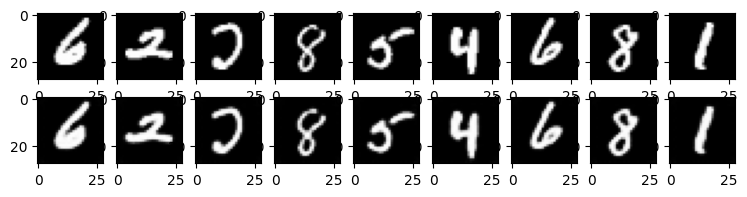

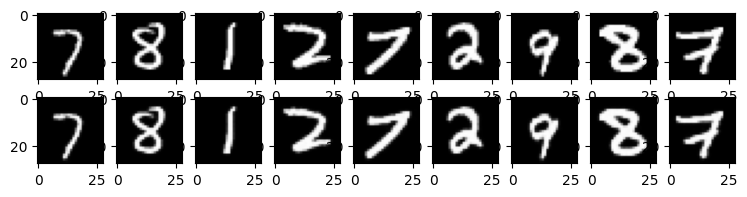

In [19]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])